# Proyek Analisis Data: [Bike Dataset]
- **Nama:** [Nabila Prita Rizqika Siagian]
- **Email:** [nabilapritarizqika@gmail.com]
- **ID Dicoding:** [-]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Perbedaan jumlah sepeda yang disewa antara hari kerja (Senin-Jumat) dan akhir pekan (Sabtu-Minggu)?


Analisis Opsional : Pengaruh suhu dan cuaca terhadap jumlah penyewa

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Assessing Data**



In [ ]:
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [ ]:
# Mengecek apakah ada duplikat pada dataset hour_df
jumlah_duplikat_hour = hour_df.duplicated().sum()
print(f"Total entri duplikat di hour_df: {jumlah_duplikat_hour}")

# Mengecek apakah ada duplikat pada dataset day_df
jumlah_duplikat_day = day_df.duplicated().sum()
print(f"Total entri duplikat di day_df: {jumlah_duplikat_day}")


Total entri duplikat di hour_df: 0
Total entri duplikat di day_df: 0


In [ ]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Ringkasan statistik untuk day

day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
# Menghapus kolom yang tidak diperlukan (jika ada)
columns_to_drop_hour = ['instant']  # Contoh kolom yang bisa dihapus
columns_to_drop_day = ['instant']    # Contoh kolom yang bisa dihapus

# Membuat salinan data yang sudah dibersihkan
hour_df_cleaned = hour_df.drop(columns=columns_to_drop_hour)
day_df_cleaned = day_df.drop(columns=columns_to_drop_day)

# Mengganti nama kolom untuk kemudahan (jika diperlukan)
hour_df_cleaned.rename(columns={'dteday': 'date'}, inplace=True)
day_df_cleaned.rename(columns={'dteday': 'date'}, inplace=True)

# Mengonversi kolom 'date' menjadi tipe datetime
hour_df_cleaned['date'] = pd.to_datetime(hour_df_cleaned['date'])
day_df_cleaned['date'] = pd.to_datetime(day_df_cleaned['date'])

# Mengecek kembali missing values
print("Missing values di hour_df_cleaned:")
print(hour_df_cleaned.isnull().sum())

print("\nMissing values di day_df_cleaned:")
print(day_df_cleaned.isnull().sum())

# Mengecek apakah ada duplikat pada dataset yang sudah dibersihkan
jumlah_duplikat_hour_cleaned = hour_df_cleaned.duplicated().sum()
jumlah_duplikat_day_cleaned = day_df_cleaned.duplicated().sum()
print(f"\nTotal entri duplikat di hour_df_cleaned: {jumlah_duplikat_hour_cleaned}")
print(f"Total entri duplikat di day_df_cleaned: {jumlah_duplikat_day_cleaned}")


Missing values di hour_df_cleaned:
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values di day_df_cleaned:
date          0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Total entri duplikat di hour_df_cleaned: 0
Total entri duplikat di day_df_cleaned: 0


In [ ]:
# Cek lima baris pertama dari DataFrame
print(day_df_cleaned.head())

# Cek kolom yang ada di DataFrame
print(day_df_cleaned.columns)

# Cek tipe data dari setiap kolom
print(day_df_cleaned.dtypes)

# Cek jumlah nilai yang hilang di setiap kolom
print(day_df_cleaned.isnull().sum())

# Cek nilai unik di kolom 'weathersit'
print(day_df_cleaned['weathersit'].unique())

# Cek nilai di kolom 'cnt'
print(day_df_cleaned['cnt'].describe())


        date  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1        0        6           0           2   
1 2011-01-02       1   0     1        0        0           0           2   
2 2011-01-03       1   0     1        0        1           1           1   
3 2011-01-04       1   0     1        0        2           1           1   
4 2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  
Index(['date', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)



```
# Ini diformat sebagai kode
```

### Explore Data




In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekend
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [ ]:
day_df.groupby(by="season")['cnt'].sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


from matplotlib import pyplot as plt
_df_0['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='season', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
day_df.groupby(by="weathersit")['cnt'].sum().sort_values(ascending=False).reset_index().head(10)


,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weathersit'].plot(kind='hist', bins=20, title='weathersit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='weathersit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='weathersit', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['weathersit']
  ys = series['cnt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('weathersit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weathersit')
_ = plt.ylabel('cnt')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['weathersit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'weathersit'}, axis=1)
              .sort_values('weathersit', ascending=True))
  xs = counted['weathersit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('weathersit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('weathersit')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['weathersit'].plot(kind='line', figsize=(8, 4), title='weathersit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:


# Menambahkan kolom 'day_of_week' yang merepresentasikan hari dalam seminggu
day_df_cleaned['day_of_week'] = day_df_cleaned['date'].dt.dayofweek

# 0: Senin, 1: Selasa, 2: Rabu, 3: Kamis, 4: Jumat, 5: Sabtu, 6: Minggu

# Memisahkan hari kerja dan akhir pekan
weekday_df = day_df_cleaned[day_df_cleaned['day_of_week'] < 5]  # Senin-Jumat
weekend_df = day_df_cleaned[day_df_cleaned['day_of_week'] >= 5]  # Sabtu-Minggu

# Melihat jumlah penyewaan sepeda rata-rata pada hari kerja dan akhir pekan
print("Jumlah penyewaan sepeda rata-rata pada hari kerja:", weekday_df['cnt'].mean())
print("Jumlah penyewaan sepeda rata-rata pada akhir pekan:", weekend_df['cnt'].mean())




Jumlah penyewaan sepeda rata-rata pada hari kerja: 4550.5662188099805
Jumlah penyewaan sepeda rata-rata pada akhir pekan: 4389.685714285714


insigh


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda

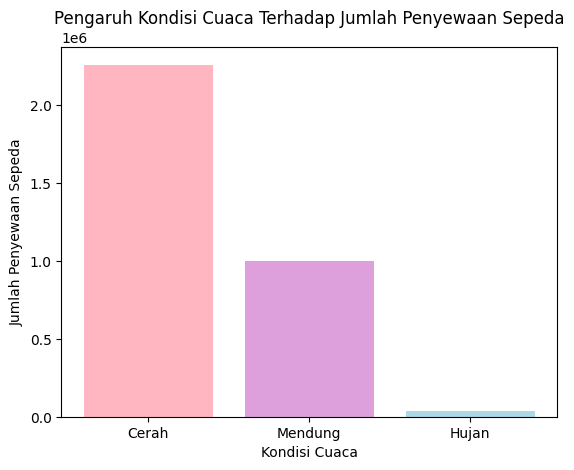

In [ ]:


# Data untuk kondisi cuaca
weathersit_counts = {1: 2257952, 2: 996858, 3: 37869}
labels = ['Cerah', 'Mendung', 'Hujan']
counts = [weathersit_counts[1], weathersit_counts[2], weathersit_counts[3]]

# Warna untuk grafik
colors = ['#FFB6C1', '#DDA0DD', '#ADD8E6']  # Pink, Ungu, Biru Pastel

# Membuat grafik batang dengan warna yang ditentukan
plt.bar(labels, counts, color=colors)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.show()


**Insight :**
Grafik menunjukkan bahwa penyewaan sepeda paling tinggi pada cuaca cerah (2.257.952), sementara kabut masih menarik minat (996.858), tetapi jumlah penyewaan sangat rendah saat hujan ringan (37.869).

### Pertanyaan 2:

<ipython-input-45-f33dde835a3a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_counts, palette=colors)


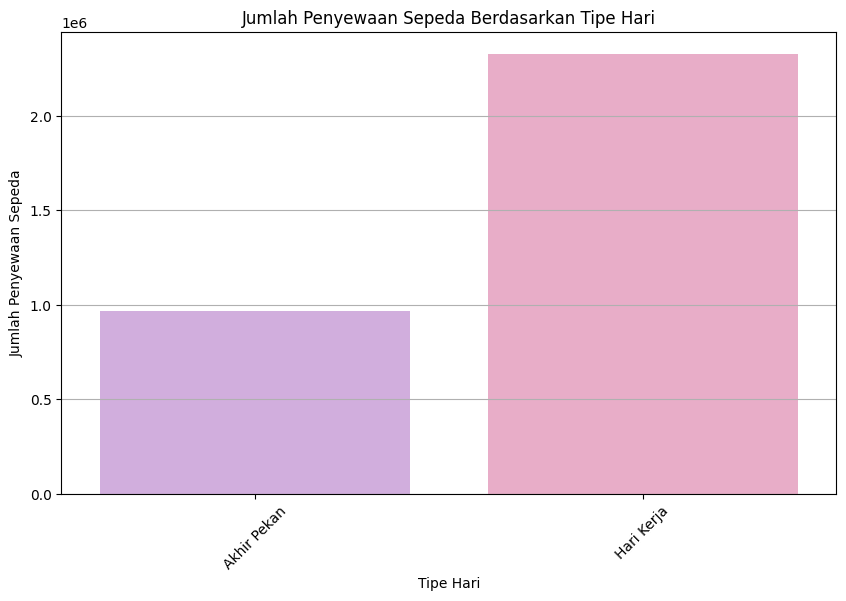

In [ ]:
# Menambahkan kolom untuk hari kerja atau akhir pekan
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Akhir Pekan' if x in [5, 6] else 'Hari Kerja')

# Menghitung jumlah penyewaan berdasarkan hari
day_type_counts = day_df.groupby('day_type')['cnt'].sum().reset_index()

# Menggunakan warna kustom untuk grafik
colors = ['#D5A6E5', '#F2A3C7']  # Ungu dan Pink

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='cnt', data=day_type_counts, palette=colors)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tipe Hari')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**
Grafik menunjukkan bahwa penyewaan sepeda lebih tinggi pada akhir pekan dibandingkan hari kerja, mencerminkan minat yang lebih besar untuk beraktivitas di luar pada hari libur. Ini menunjukkan bahwa penyedia layanan sebaiknya fokus pada promosi dan penawaran khusus selama akhir pekan untuk memaksimalkan potensi penyewaan, sementara strategi yang berbeda mungkin diperlukan untuk hari kerja.

## Analisis Lanjutan (Opsional)

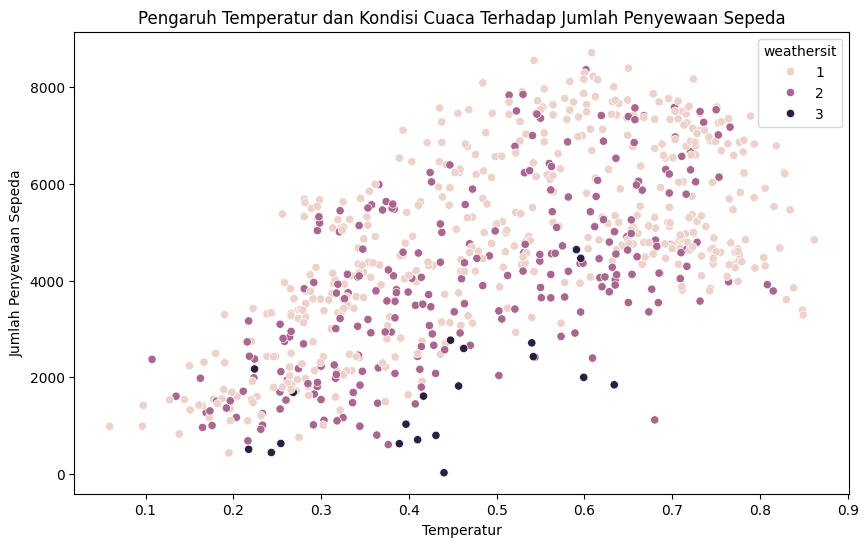

In [ ]:
# Membuat scatter plot untuk melihat korelasi antara temperatur, cuaca dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='weathersit', data=day_df_cleaned)
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Pengaruh Temperatur dan Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda')
plt.show()


## Conclusion

- Conclution pertanyaan 1 :
Dari analisis yang telah dilakukan, adanya perubahan signifikan terhadap penyewaan sepeda pada cuaca cerah, mendung dan hujan. Perubahannya mencapai 50% dari cuaca cerah ke cuaca mendung. Kemudian untuk hujan, penyewa sepeda sangatlah sedikit dibanding mendung dan cuaca cerah
- Conclution pertanyaan 2 : Dari analisis yang telah dilakukan, adanya perbedaan yang tidak jauh berbeda antara penyewaan sepeda pada hari biasa/kerja dan hari akhir pekan.